<a href="https://colab.research.google.com/github/jfdac11/DataMiningPI/blob/main/R_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Configuração

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive

In [ ]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


##Configuração R


In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages('rattle')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘bitops’, ‘XML’, ‘rpart.plot’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/bitops_1.0-7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 10809 bytes (10 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [ ]:
%%R
require(rattle)
require(rpart)
require(rpart.plot)

R[write to console]: Loading required package: rattle

R[write to console]: Loading required package: tibble

R[write to console]: Loading required package: bitops

R[write to console]: Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

R[write to console]: Loading required package: rpart.plot



## Árvore de Decisão em R

In [ ]:
%%R
bd_2019 = read.csv('/content/MyDrive/Shareddrives/PI_2_2021/Datasets Pre-processados/dobrano_2019_pre_preprocessado.csv', sep=";", dec=".", header=TRUE)
bd_2019_respiratorio = bd_2019[bd_2019$cod_capitulo_causa_basica == 10, ]
bd_2019_doencas = bd_2019[bd_2019$cod_grupo_causa_basica != "Y10-Y34", ]

bd_2020 = read.csv('/content/MyDrive/Shareddrives/PI_2_2021/Datasets Pre-processados/dobrano_2020_pre_preprocessado.csv', sep=";", dec=".", header=TRUE)
bd_2020_respiratorio = bd_2020[bd_2020$cod_capitulo_causa_basica == 10, ]
bd_2020_doencas = bd_2020[bd_2020$cod_grupo_causa_basica != "Y10-Y34", ]

In [ ]:
%%R
data = bd_2020
gp_ocupacao = as.factor(data$codigo_grupo_ocupacao)
model = rpart(formula=as.factor(cod_grupo_causa_basica) ~ idade+sexo+raca_cor+gp_ocupacao, 
              data=data, 
              method="class", 
              control = rpart.control(maxdepth = 10,
                                      minsplit = 60000, 
                                      cp = 0)
              )
model

n= 1226210 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1226210 1118017 I20-I25 (0.0012 0.0033 0.0037 0.00022 0.02 0.00023 8.2e-06 2.4e-06 3.1e-05 0.00029 0.00066 0.0002 0.0015 0.0085 0.00061 0.00035 0.0037 0.00044 6.3e-05 0.00042 6.8e-05 0.0064 0.06 0.028 0.0016 0.0037 0.0024 0.015 0.012 0.013 0.0069 0.0077 0.0011 0.012 0.012 5.1e-05 0.00025 0.00063 0.0028 0.00056 0.00061 0.0024 0.0011 0.0005 0.00014 0.0008 0.061 0.00042 0.00016 0.0037 0.00012 0.0031 0.0054 0.0031 0.009 0.00075 0.00064 9.2e-05 3e-05 9e-06 0.0001 4.9e-05 5.7e-06 0.00017 0.001 0.0016 0.0039 0.021 0.00036 0.0034 1.5e-05 0.00051 0.00042 0.0012 0.0027 6.5e-06 8.2e-07 9.8e-06 3.3e-06 4.1e-06 0.00011 9.8e-06 1.6e-06 0.00012 0.0015 0.052 0.088 0.0057 0.048 0.08 0.0096 0.0031 0.00028 0.00032 0.057 0.00081 0.00023 0.032 0.0053 0.0049 0.00043 0.0012 0.021 7e-05 0.004 0.00087 0.002 0.00076 0.0092 0.0015 0.021 0.0079 0.0068 0.0031 0.00013 1.5e-05 2e-05 7.7e-05 0.0023 0.00018 0.00049 0.00021 2.4e-

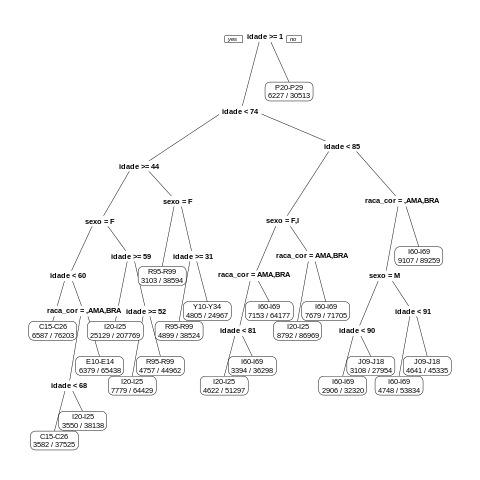

In [ ]:
%%R
prp(model, extra = 2, tweak = 1.15)

In [ ]:
%%R
png(file="/content/MyDrive/Shareddrives/PI_2_2021/DM-Plotagens/dt_2020.png",
width=1680, height=720)
prp(model, extra = 2, tweak = 1.15)
dev.off()




png 
  2 
